In [1]:
%matplotlib inline

In [1]:
codis = pd.read_csv('data/codis.csv')
items = pd.read_csv('data/items.csv')

In [2]:
codis['id_codi'].value_counts()

395879    5
395874    5
396132    5
396129    5
396127    5
396642    5
396641    5
395876    5
395875    5
396711    3
396718    3
395814    3
396356    3
395660    3
396069    3
396067    3
396575    3
395781    3
395560    3
396714    3
395758    3
396327    3
396323    3
396135    3
396203    3
396205    3
396839    3
396836    3
396706    3
395815    3
         ..
396390    1
396392    1
396439    1
396393    1
396435    1
396434    1
396433    1
396430    1
396429    1
396428    1
396425    1
396422    1
396418    1
396417    1
396416    1
396415    1
396414    1
396412    1
396410    1
396405    1
396404    1
396403    1
396402    1
396399    1
396398    1
396397    1
396396    1
396395    1
396394    1
395456    1
Name: id_codi, Length: 1116, dtype: int64

In [3]:
items['id_item'].value_counts()

71922    104
73186     57
71319     49
54358     42
57703     40
82682     39
73825     35
74748     35
66802     33
52187     33
81924     31
76082     31
52122     31
78577     30
70294     28
57686     26
55354     26
73921     24
70122     23
77340     23
66801     23
72020     23
54347     23
65526     23
61632     22
82257     22
82296     21
65687     20
54360     19
81826     19
        ... 
60151      1
11007      1
54020      1
82702      1
51855      1
70284      1
61972      1
82558      1
68123      1
82470      1
47657      1
7215       1
82478      1
82482      1
70196      1
82486      1
70200      1
82490      1
35399      1
70220      1
70146      1
57942      1
70232      1
80477      1
47713      1
41574      1
70260      1
82550      1
73077      1
65536      1
Name: id_item, Length: 2306, dtype: int64

In [7]:
import cv2
from sklearn.cluster import KMeans

In [8]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [9]:
def image_color_cluster(image_path, k = 5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    print(bar.shape)
    plt.imshow(bar)
    plt.show()

In [10]:
image_path = "1.jpeg"

#preview image
image = cv2.imread(image_path) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합

image_color_cluster(image_path)


(50, 300, 3)


(1304, 1408, 3)


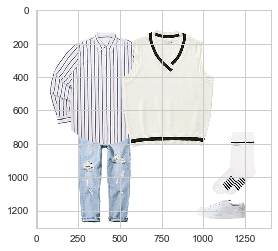

In [25]:
image_path = "1.jpeg"

#preview image
image = cv2.imread(image_path) 
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

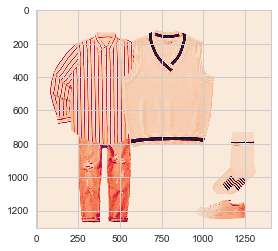

In [24]:
# Read image
im_in = cv2.imread("1.jpeg", cv2.IMREAD_GRAYSCALE);
plt.imshow(im_in)

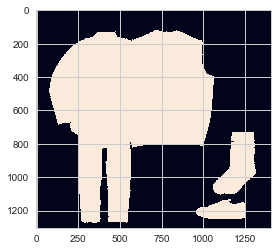

In [18]:

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(im_in, 254, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
# plt.imshow( im_th)
# plt.show()
# plt.imshow( im_floodfill)
# plt.show()
# plt.imshow(im_floodfill_inv)
# plt.show()
plt.imshow(im_out) 
plt.show()

In [22]:
im_out.shape

(1304, 1408)

In [23]:
im_in.shape

(1304, 1408)